# Práctica 1- Formación y Ev. Galaxias

## Primera parte

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import AutoMinorLocator
from scipy.optimize import curve_fit

### Árboles de fusiones de halos de materia oscura

Fusiones para un halo individual

Este halo tiene una ID= 3000100000000 
Masa actual: 504.00058 



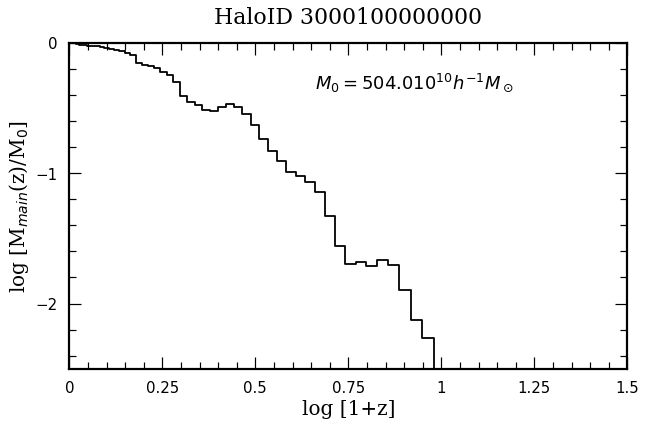

In [2]:
# Escogemos una galaxia de prueba
orden = 3
gal = 6
namefile = 'DMat'+str(orden)+'.'+str(gal)+'.txt'

# Leemos los datos
data = pd.read_csv(namefile,sep=',')
print('Este halo tiene una ID=',data.haloID[0],'\nMasa actual:',data.m_Mean200[0],'\n')
data_names = data.columns.values.tolist()
#print('NOMBRES DE COLUMNAS:',data_names)  # Mostrar nombres de las columnas


# Buscamos la historia de MAIN HALO
for i in range(len(data)-1):
    if data.snapNum[i] <= data.snapNum[i+1]:
        inicio = i
        break

        
# Corregimos los ceros que aparecen en los datos
redshift = np.array(data.redshift[0:inicio+1])
masa = np.array(data.m_Mean200[0:inicio+1])

while masa[len(masa)-1]<1e-5:     #borramos ceros al inicio del halo
    redshift = np.delete(redshift,len(masa)-1)
    masa = np.delete(masa,len(masa)-1)

ceros = []     #convertimos en NA ceros internos
last_cero = -10
for i in range(len(masa)):
    if masa[i]<1e-5:
        masa[i] = np.nan
        #marcamos el inicio del fallo
        if abs(i-last_cero)!=1:
            ceros.append(i-1)
        last_cero = i
    else:
        #marcamos donde finaliza el fallo
        if abs(i-last_cero)==1:
            ceros.append(i)
            

            
            
# Dibujamos la gráfica
fig,ax = plt.subplots(figsize=(10,6))

#Parámetros del gráfico
ax.set_xlim([0,1.5])
ax.set_ylim([-2.5,0])
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)

ax.spines[['bottom','left','top','right']].set_linewidth(2.2)

ax.tick_params(axis='both',which='both',direction='in',width=1.2)
ax.tick_params(axis='both',which='major',labelsize=15,length=12,pad=12)
ax.tick_params(axis='both',which='minor',length=7)

#labels ejes
ax.set_yticks([-2,-1,0])
ax.set_xticks([0,0.25,0.50,0.75,1,1.25,1.5])
ax.set_xticklabels(['0','0.25','0.5','0.75','1','1.25','1.5'])

#titulos
ax.set_title('HaloID '+str(data.haloID[0]),y=1.04,fontsize=22,fontname='serif')
ax.set_xlabel('log [1+z]',fontsize=20,fontname='serif',y=-4)
ax.set_ylabel('log [M$_{main}$(z)/M$_0$]',fontsize=20,fontname='serif')
ax.text(0.66,-0.35,s=r'$M_0=$'+str(data.m_Mean200[0].round(1))+r'$10^{10}h^{-1}M_\odot$',
       fontsize=18)

#gráfica
x = np.concatenate((np.log10(1+redshift),[np.log10(1+redshift[len(redshift)-1])]))
y = np.concatenate((np.log10(masa/masa[0]),[-10]))

ax.plot(x,y,drawstyle='steps-post',color='k',linewidth=1.8)

for i in np.arange(0,len(ceros)-1,step=2):     #dibuja las discontinuidades
    ceros_dos = [ceros[i],ceros[i+1]]
    
    ax.plot(x[[ceros_dos[0]+1,ceros_dos[1]]],y[ceros_dos],color='k',linestyle='-.',linewidth=1.4)

plt.show()

Contruimos una figura con todos los halos de ese orden de masa y obtenemos los arboles de fusiones promedio para cada orden de masas

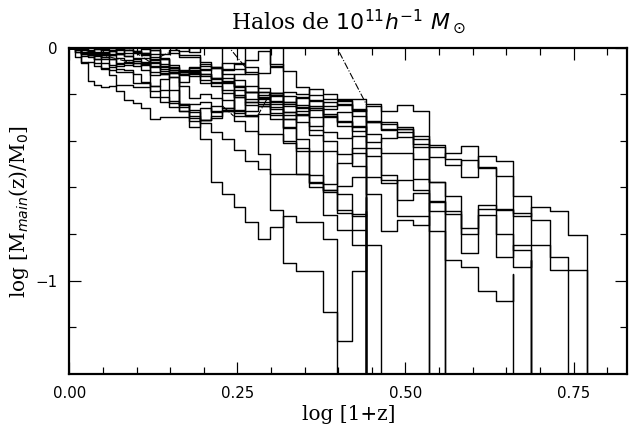

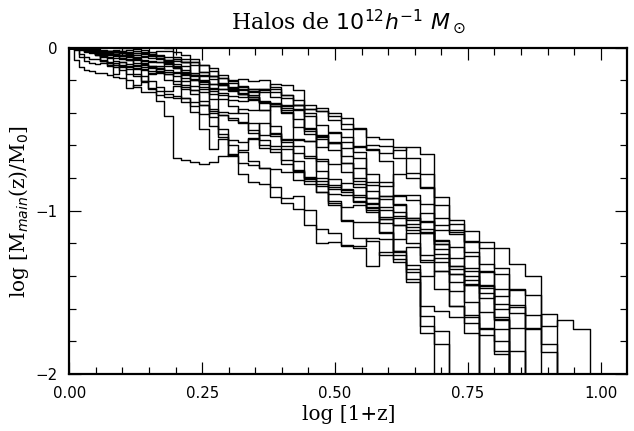

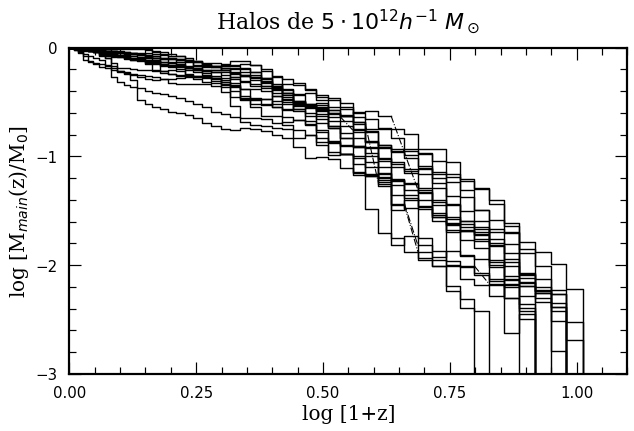

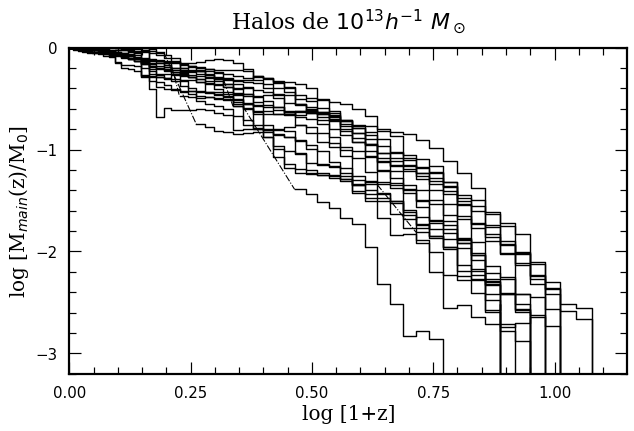

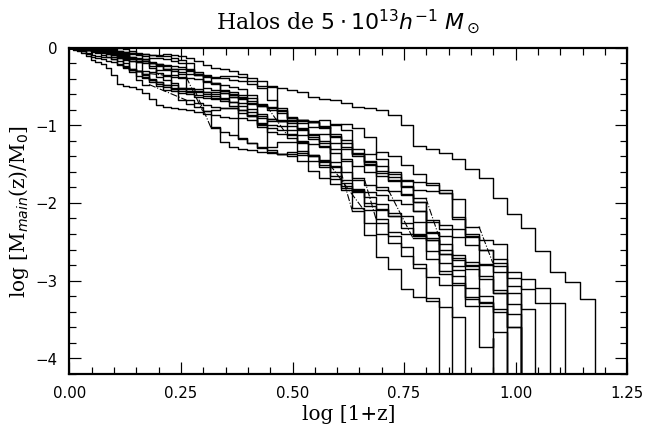

C:\Users\Javier\AppData\Local\Temp/ipykernel_9504/3793391475.py:123: RuntimeWarning: invalid value encountered in true_divide
  promedio_low = Smass_low/total_dat_low


VALORES OBTENIDOS CON PROMEDIO DE DATOS REALES
 Halos de color tab:blue presentan un z_f = 1.152 y un nu = 1.31
 Halos de color tab:orange presentan un z_f = 0.96 y un nu = 1.63
 Halos de color tab:green presentan un z_f = 1.079 y un nu = 1.88
 Halos de color tab:red presentan un z_f = 0.919 y un nu = 1.69
 Halos de color tab:purple presentan un z_f = 0.677 y un nu = 1.52


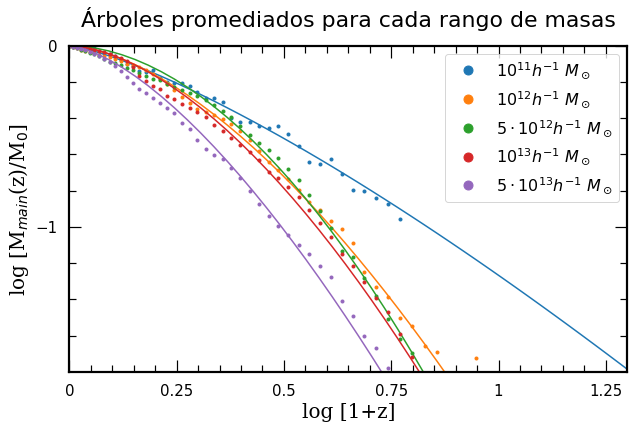

VALORES OBTENIDOS CON PROMEDIO DE DATOS FORZANDAO A SER COMPLETADOS
 Halos de color tab:blue presentan un z_f = 1.104 y un nu = 2.04
 Halos de color tab:orange presentan un z_f = 1.009 y un nu = 1.76
 Halos de color tab:green presentan un z_f = 1.085 y un nu = 1.9
 Halos de color tab:red presentan un z_f = 0.923 y un nu = 1.71
 Halos de color tab:purple presentan un z_f = 0.703 y un nu = 1.58


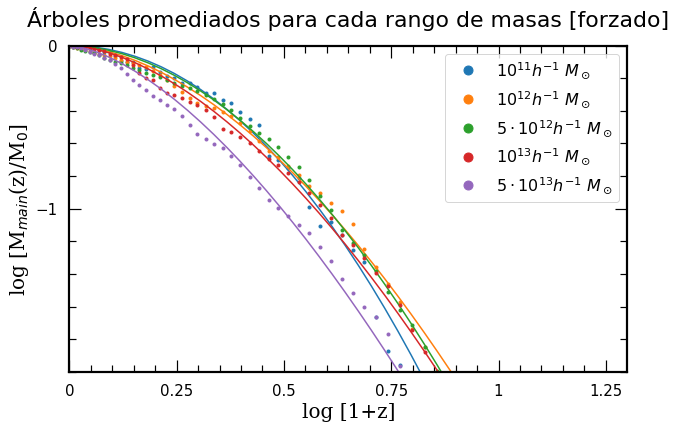

In [3]:
# Parámetros de las gráficas
nombre_orden = ['$10^{11} h^{-1} \ M_\odot $','$10^{12} h^{-1} \ M_\odot $','$5 \cdot 10^{12} h^{-1} \ M_\odot $','$10^{13} h^{-1} \ M_\odot $','$5 \cdot 10^{13} h^{-1} \ M_\odot $']
y_minlims = [-1.4,-2,-3,-3.2,-4.2]
x_maxlims = [0.83,1.05,1.1,1.15,1.2500001]


### Creamos los vectores que almacenan los datos promediados
Smass = np.zeros([64,5])
Smass_low = Smass.copy()
total_dat = np.zeros([len(Smass),5])
total_dat_low = total_dat.copy()
z_total = np.zeros(len(Smass))



# Establecemos las galaxias a estudiar
for orden in range(1,6):
    if orden==5:
        gal_limit = 17  #no se encuentran 20 halos masivos
    else:
        gal_limit = 20
           
      
        
    # Iniciamos la gráfica para cada orden de masa
    fig,ax = plt.subplots(figsize=(10,6))
    #Parámetros del gráfico
    ax.set_xlim([0,x_maxlims[orden-1]])
    ax.set_ylim([y_minlims[orden-1],0])
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(bottom=True,top=True,left=True,right=True)
    ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)
    ax.spines[['bottom','left','top','right']].set_linewidth(2.2)
    ax.tick_params(axis='both',which='both',direction='in',width=1.2)
    ax.tick_params(axis='both',which='major',labelsize=15,length=12,pad=12)
    ax.tick_params(axis='both',which='minor',length=7)
    #ticks ejes
    ax.set_yticks(np.arange(int(y_minlims[orden-1]),1))
    ax.set_xticks(np.arange(0,x_maxlims[orden-1],step=0.25))    
    #títulos
    ax.set_title('Halos de '+nombre_orden[orden-1],y=1.04,fontsize=22,fontname='serif')
    ax.set_xlabel('log [1+z]',fontsize=20,fontname='serif',y=-4)
    ax.set_ylabel('log [M$_{main}$(z)/M$_0$]',fontsize=20,fontname='serif')
    

    # Comenzamos los cálculos para cada galaxia
    for gnumb in range(gal_limit):
        namefile = 'DMat'+str(orden)+'.'+str(gnumb)+'.txt' #galaxia a estudiar

        # Leemos los datos
        data = pd.read_csv(namefile,sep=',')
        #print('Este halo tiene una ID=',data.haloID[0],'\nMasa actual:',data.m_Mean200[0],'\n')
        #data_names = data.columns.values.tolist()
        #print('NOMBRES DE COLUMNAS:',data_names)  # Mostrar nombres de las columnas

        # Buscamos la historia de MAIN HALO
        for i in range(len(data)-1):
            if data.snapNum[i] <= data.snapNum[i+1]:
                inicio = i
                break

        # Corregimos los ceros que aparecen en los datos
        redshift = np.array(data.redshift[0:inicio+1])
        masa = np.array(data.m_Mean200[0:inicio+1])

        while masa[len(masa)-1]<1e-5:     #borramos ceros al inicio del halo
            redshift = np.delete(redshift,len(masa)-1)
            masa = np.delete(masa,len(masa)-1)

        ceros = []     #convertimos en NA ceros internos
        last_cero = -10
        masa_complet = masa.copy()    ### masa sin nan completada para datos promedios
        
        for i in range(len(masa)):
            if masa[i]<1e-5:
                masa[i] = np.nan
                if masa[i-1]>1e-5:     #densidad masa por particula
                    densityNP = data.m_Mean200[i-1]/data.np[i-1]
                masa_complet[i]= data.np[i]*densityNP   #TRAMPAS
                
                #marcamos el inicio del fallo
                if abs(i-last_cero)!=1:
                    ceros.append(i-1)
                last_cero = i
            else:
                #marcamos donde finaliza el fallo
                if abs(i-last_cero)==1:
                    ceros.append(i)

                    
        #gráfica
        x = np.concatenate((np.log10(1+redshift),[np.log10(1+redshift[len(redshift)-1])]))
        y = np.concatenate((np.log10(masa/masa[0]),[-7]))

        ax.plot(x,y,drawstyle='steps-post',color='k',linewidth=1.4)

        for i in np.arange(0,len(ceros)-1,step=2):     #dibuja las discontinuidades
            ceros_dos = [ceros[i],ceros[i+1]]

            ax.plot(x[[ceros_dos[0]+1,ceros_dos[1]]],y[ceros_dos],color='k',linestyle='-.',linewidth=1.1)
            
            
        ### Rellenamos los arrays para los datos promedios
        for i in range(len(masa)):
            j = data.snapNum[i]    #pueden faltar pasos en snapNum
            if np.isnan(masa[i])==False:    #Si no es nan
                Smass[j,orden-1] += masa[i]/masa[0]
                total_dat[j,orden-1] += 1
            Smass_low[j,orden-1] += masa_complet[i]/masa[0]    ### dividimos entre el total de halos
            total_dat_low[j,orden-1] = gal_limit
            z_total[j] = data.redshift[i]   #recogemos todos los redshift necesarios
                
    plt.show()
    
    
### Retiramos los valores nulos para promediar los datos
total_dat[total_dat==0]=np.nan

#total_dat_low[total_dat<7] = np.nan

promedio = Smass/total_dat
promedio_low = Smass_low/total_dat_low

### Gráfica de promedio
fig,ax = plt.subplots(figsize=(10,6))

#Parámetros del gráfico
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)
ax.spines[['bottom','left','top','right']].set_linewidth(2.2)
ax.tick_params(axis='both',which='both',direction='in',width=1.2)
ax.tick_params(axis='both',which='major',labelsize=15,length=12,pad=12)
ax.tick_params(axis='both',which='minor',length=7)

#labels ejes
ax.set_yticks([-4,-3,-2,-1,0])
ax.set_xticks([0,0.25,0.50,0.75,1,1.25])
ax.set_xticklabels(['0','0.25','0.5','0.75','1','1.25'])
ax.set_xlim([0,1.3])
ax.set_ylim([-1.8,0])

#titulos
ax.set_title('Árboles promediados para cada rango de masas',y=1.04,fontsize=22)
ax.set_xlabel('log [1+z]',fontsize=20,fontname='serif',y=-4)
ax.set_ylabel('log [M$_{main}$(z)/M$_0$]',fontsize=20,fontname='serif')

#gráfica
print('VALORES OBTENIDOS CON PROMEDIO DE DATOS REALES')
colores = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
x = np.log10(1+z_total)
for i1 in range(5):
    y = np.log10(promedio[:,i1])
    ax.plot(x,y,'.',linewidth=1.8,color=colores[i1],label=str(nombre_orden[i1]))
    #Ajuste no lineal
    x_adj = x[~np.isnan(y)][5:]
    y_adj = y[~np.isnan(y)][5:]
    def ajust2(x,z_f,nu):
        return -0.301*(x/np.log10(1+z_f))**nu
    popt, pcov = curve_fit(ajust2,x_adj,y_adj)
    ax.plot(np.linspace(0,1.5,50),ajust2(np.linspace(0,1.5,50),*popt),color=colores[i1])
    print(' Halos de color',colores[i1],'presentan un z_f =',np.round(popt[0],3),'y un nu =',np.round(popt[1],2))
    
    
ax.legend(fontsize=16,markerscale=3.0)
plt.show()



### Gráfica de promedio_low
fig,ax = plt.subplots(figsize=(10,6))

#Parámetros del gráfico
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)
ax.spines[['bottom','left','top','right']].set_linewidth(2.2)
ax.tick_params(axis='both',which='both',direction='in',width=1.2)
ax.tick_params(axis='both',which='major',labelsize=15,length=12,pad=12)
ax.tick_params(axis='both',which='minor',length=7)

#labels ejes
ax.set_yticks([-4,-3,-1,0])
ax.set_xticks([0,0.25,0.50,0.75,1,1.25])
ax.set_xticklabels(['0','0.25','0.5','0.75','1','1.25'])
ax.set_xlim([0,1.3])
ax.set_ylim([-2,0])

#titulos
ax.set_title('Árboles promediados para cada rango de masas [forzado]',y=1.04,fontsize=22)
ax.set_xlabel('log [1+z]',fontsize=20,fontname='serif',y=-4)
ax.set_ylabel('log [M$_{main}$(z)/M$_0$]',fontsize=20,fontname='serif')

#gráfica
print('VALORES OBTENIDOS CON PROMEDIO DE DATOS FORZANDAO A SER COMPLETADOS')
colores = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
x = np.log10(1+z_total)
for i1 in range(5):
    y = np.log10(promedio_low[:,i1])
    ax.plot(x,y,'.',linewidth=1.8,color=colores[i1],label=str(nombre_orden[i1]))
    #Ajuste no lineal
    x_adj = x[~np.isnan(y)][5:]
    y_adj = y[~np.isnan(y)][5:]
    def ajust2(x,z_f,nu):
        return -0.301*(x/np.log10(1+z_f))**nu
    popt, pcov = curve_fit(ajust2,x_adj,y_adj)
    ax.plot(np.linspace(0,1.5,50),ajust2(np.linspace(0,1.5,50),*popt),color=colores[i1])
    print(' Halos de color',colores[i1],'presentan un z_f =',np.round(popt[0],3),'y un nu =',np.round(popt[1],2))
    
    
ax.legend(fontsize=16,markerscale=3.0)
plt.show()

### Masa en estrellas

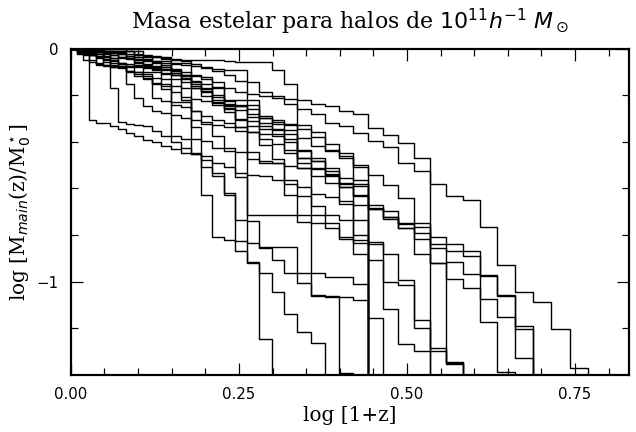

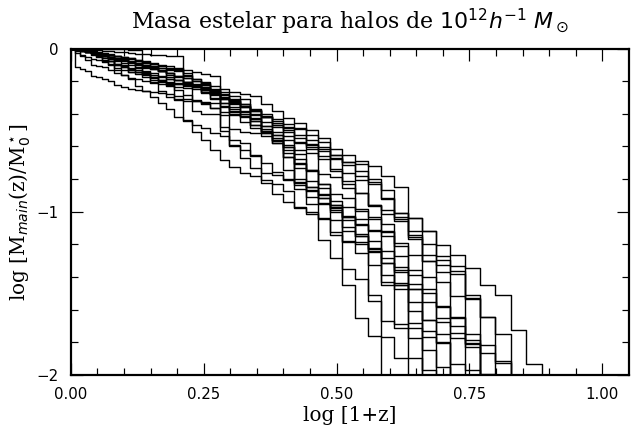

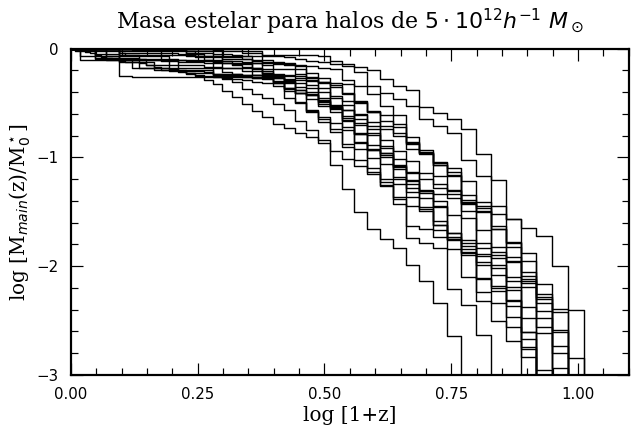

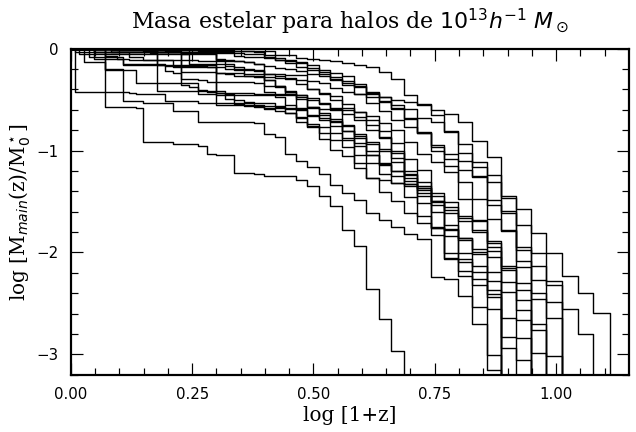

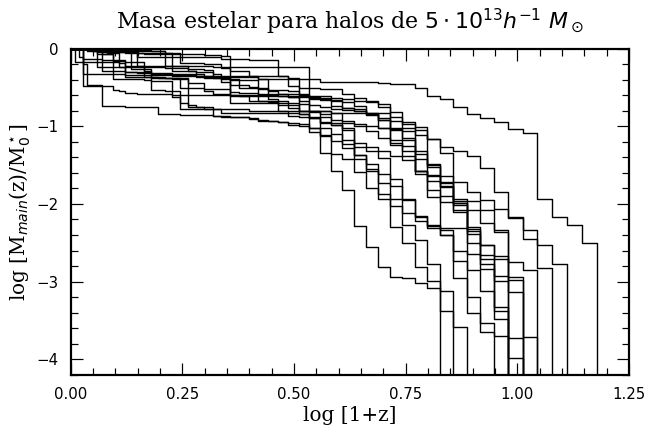

C:\Users\Javier\AppData\Local\Temp/ipykernel_9504/4031692831.py:125: RuntimeWarning: invalid value encountered in true_divide
  promedio_low = Smass_low/total_dat_low


VALORES OBTENIDOS CON PROMEDIO DE DATOS REALES
 Halos de color tab:blue presentan un z_f = 0.732 y un nu = 1.43
 Halos de color tab:orange presentan un z_f = 0.847 y un nu = 1.76
 Halos de color tab:green presentan un z_f = 1.687 y un nu = 2.73
 Halos de color tab:red presentan un z_f = 1.64 y un nu = 2.5
 Halos de color tab:purple presentan un z_f = 0.993 y un nu = 1.62


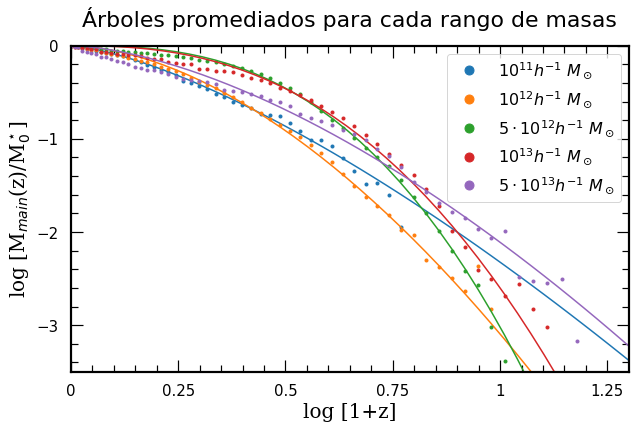

VALORES OBTENIDOS CON PROMEDIO DE DATOS FORZANDAO A SER COMPLETADOS
 Halos de color tab:blue presentan un z_f = 0.773 y un nu = 1.83
 Halos de color tab:orange presentan un z_f = 0.955 y un nu = 2.02
 Halos de color tab:green presentan un z_f = 1.708 y un nu = 2.78
 Halos de color tab:red presentan un z_f = 1.803 y un nu = 2.82
 Halos de color tab:purple presentan un z_f = 1.202 y un nu = 1.94


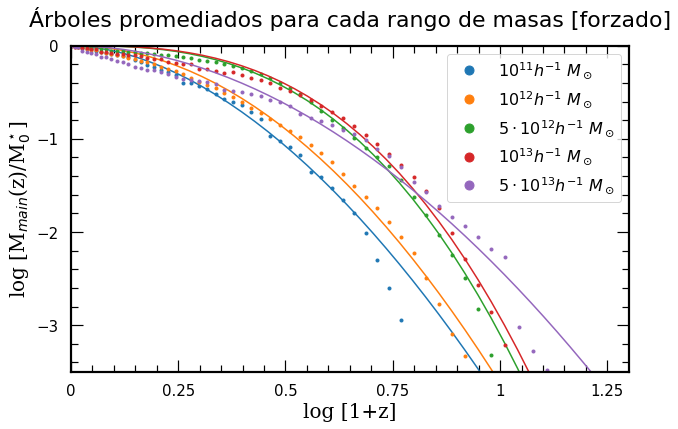

In [4]:
# Parámetros de las gráficas
nombre_orden = ['$10^{11} h^{-1} \ M_\odot $','$10^{12} h^{-1} \ M_\odot $','$5 \cdot 10^{12} h^{-1} \ M_\odot $','$10^{13} h^{-1} \ M_\odot $','$5 \cdot 10^{13} h^{-1} \ M_\odot $']
y_minlims = [-1.4,-2,-3,-3.2,-4.2]
x_maxlims = [0.83,1.05,1.1,1.15,1.2500001]


### Creamos los vectores que almacenan los datos promediados
Smass = np.zeros([64,5])
Smass_low = Smass.copy()
total_dat = np.zeros([len(Smass),5])
total_dat_low = total_dat.copy()
z_total = np.zeros(len(Smass))



# Establecemos las galaxias a estudiar
for orden in range(1,6):
    if orden==5:
        gal_limit = 17  #no se encuentran 20 halos masivos
    else:
        gal_limit = 20
           
      
        
    # Iniciamos la gráfica para cada orden de masa
    fig,ax = plt.subplots(figsize=(10,6))
    #Parámetros del gráfico
    ax.set_xlim([0,x_maxlims[orden-1]])
    ax.set_ylim([y_minlims[orden-1],0])
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(bottom=True,top=True,left=True,right=True)
    ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)
    ax.spines[['bottom','left','top','right']].set_linewidth(2.2)
    ax.tick_params(axis='both',which='both',direction='in',width=1.2)
    ax.tick_params(axis='both',which='major',labelsize=15,length=12,pad=12)
    ax.tick_params(axis='both',which='minor',length=7)
    #ticks ejes
    ax.set_yticks(np.arange(int(y_minlims[orden-1]),1))
    ax.set_xticks(np.arange(0,x_maxlims[orden-1],step=0.25))    
    #títulos
    ax.set_title('Masa estelar para halos de '+nombre_orden[orden-1],y=1.04,fontsize=22,fontname='serif')
    ax.set_xlabel('log [1+z]',fontsize=20,fontname='serif',y=-4)
    ax.set_ylabel('log [M$_{main}$(z)/M$^\star _0$]',fontsize=20,fontname='serif')
    

    # Comenzamos los cálculos para cada galaxia
    for gnumb in range(gal_limit):
        namefile = 'gal'+str(orden)+'.'+str(gnumb)+'.txt' #galaxia a estudiar

        # Leemos los datos
        data = pd.read_csv(namefile,sep=',')
        #print('Este halo tiene una ID=',data.haloID[0],'\nMasa actual:',data.m_Mean200[0],'\n')
        #data_names = data.columns.values.tolist()
        #print('NOMBRES DE COLUMNAS:',data_names)  # Mostrar nombres de las columnas

        # Buscamos la historia de MAIN HALO
        for i in range(len(data)-1):
            if data.snapnum[i] <= data.snapnum[i+1]:
                inicio = i
                break

        # Corregimos los ceros que aparecen en los datos
        redshift = np.array(data.redshift[0:inicio+1])
        masa = np.array(data.stellarMass[0:inicio+1])

        while masa[len(masa)-1]<1e-5:     #borramos ceros al inicio del halo
            redshift = np.delete(redshift,len(masa)-1)
            masa = np.delete(masa,len(masa)-1)

        ceros = []     #convertimos en NA ceros internos
        last_cero = -10
        masa_complet = masa.copy()    ### masa sin nan completada para datos promedios
        
        for i in range(len(masa)):
            if masa[i]<1e-5:
                masa[i] = np.nan
                if masa[i-1]>1e-5:     # promediamos la masa
                    i1 = int(i)
                    while masa[i1]<1e-5:
                        i1 += 1
                masa_complet[i] =  (masa[i1]+masa[i])/2
                
                #marcamos el inicio del fallo
                if abs(i-last_cero)!=1:
                    ceros.append(i-1)
                last_cero = i
            else:
                #marcamos donde finaliza el fallo
                if abs(i-last_cero)==1:
                    ceros.append(i)

                    
        #gráfica
        x = np.concatenate((np.log10(1+redshift),[np.log10(1+redshift[len(redshift)-1])]))
        y = np.concatenate((np.log10(masa/masa[0]),[-7]))

        ax.plot(x,y,drawstyle='steps-post',color='k',linewidth=1.4)

        for i in np.arange(0,len(ceros)-1,step=2):     #dibuja las discontinuidades
            ceros_dos = [ceros[i],ceros[i+1]]

            ax.plot(x[[ceros_dos[0]+1,ceros_dos[1]]],y[ceros_dos],color='k',linestyle='-.',linewidth=1.1)
            
            
        ### Rellenamos los arrays para los datos promedios
        for i in range(len(masa)):
            j = data.snapnum[i]    #pueden faltar pasos en snapNum
            if np.isnan(masa[i])==False:    #Si no es nan
                Smass[j,orden-1] += masa[i]/masa[0]
                total_dat[j,orden-1] += 1
            Smass_low[j,orden-1] += masa_complet[i]/masa[0]    ### dividimos entre el total de halos
            total_dat_low[j,orden-1] = gal_limit
            z_total[j] = data.redshift[i]   #recogemos todos los redshift necesarios
                
    plt.show()
    
    
### Retiramos los valores nulos para promediar los datos
total_dat[total_dat==0]=np.nan

#total_dat_low[total_dat<7] = np.nan

promedio = Smass/total_dat
promedio_low = Smass_low/total_dat_low

### Gráfica de promedio
fig,ax = plt.subplots(figsize=(10,6))

#Parámetros del gráfico
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)
ax.spines[['bottom','left','top','right']].set_linewidth(2.2)
ax.tick_params(axis='both',which='both',direction='in',width=1.2)
ax.tick_params(axis='both',which='major',labelsize=15,length=12,pad=12)
ax.tick_params(axis='both',which='minor',length=7)

#labels ejes
ax.set_yticks([-4,-3,-2,-1,0])
ax.set_xticks([0,0.25,0.50,0.75,1,1.25])
ax.set_xticklabels(['0','0.25','0.5','0.75','1','1.25'])
ax.set_xlim([0,1.3])
ax.set_ylim([-3.5,0])

#titulos
ax.set_title('Árboles promediados para cada rango de masas',y=1.04,fontsize=22)
ax.set_xlabel('log [1+z]',fontsize=20,fontname='serif',y=-4)
ax.set_ylabel('log [M$_{main}$(z)/M$^\star _0$]',fontsize=20,fontname='serif')

#gráfica
print('VALORES OBTENIDOS CON PROMEDIO DE DATOS REALES')
colores = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
x = np.log10(1+z_total)
for i1 in range(5):
    y = np.log10(promedio[:,i1])
    ax.plot(x,y,'.',linewidth=1.8,color=colores[i1],label=str(nombre_orden[i1]))
    #Ajuste no lineal
    x_adj = x[~np.isnan(y)][3:]
    y_adj = y[~np.isnan(y)][3:]
    def ajust2(x,z_f,nu):
        return -0.301*(x/np.log10(1+z_f))**nu
    popt, pcov = curve_fit(ajust2,x_adj,y_adj)
    ax.plot(np.linspace(0,1.5,50),ajust2(np.linspace(0,1.5,50),*popt),color=colores[i1])
    print(' Halos de color',colores[i1],'presentan un z_f =',np.round(popt[0],3),'y un nu =',np.round(popt[1],2))
    
    
ax.legend(fontsize=16,markerscale=3.0)
plt.show()



### Gráfica de promedio_low
fig,ax = plt.subplots(figsize=(10,6))

#Parámetros del gráfico
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)
ax.spines[['bottom','left','top','right']].set_linewidth(2.2)
ax.tick_params(axis='both',which='both',direction='in',width=1.2)
ax.tick_params(axis='both',which='major',labelsize=15,length=12,pad=12)
ax.tick_params(axis='both',which='minor',length=7)

#labels ejes
ax.set_yticks([-4,-3,-2,-1,0])
ax.set_xticks([0,0.25,0.50,0.75,1,1.25])
ax.set_xticklabels(['0','0.25','0.5','0.75','1','1.25'])
ax.set_xlim([0,1.3])
ax.set_ylim([-3.5,0])

#titulos
ax.set_title('Árboles promediados para cada rango de masas [forzado]',y=1.04,fontsize=22)
ax.set_xlabel('log [1+z]',fontsize=20,fontname='serif',y=-4)
ax.set_ylabel('log [M$_{main}$(z)/M$^\star _0$]',fontsize=20,fontname='serif')

#gráfica
print('VALORES OBTENIDOS CON PROMEDIO DE DATOS FORZANDAO A SER COMPLETADOS')
colores = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
x = np.log10(1+z_total)
for i1 in range(5):
    y = np.log10(promedio_low[:,i1])
    ax.plot(x,y,'.',linewidth=1.8,color=colores[i1],label=str(nombre_orden[i1]))
    #Ajuste no lineal
    x_adj = x[~np.isnan(y)][3:]
    y_adj = y[~np.isnan(y)][3:]
    def ajust2(x,z_f,nu):
        return -0.301*(x/np.log10(1+z_f))**nu
    popt, pcov = curve_fit(ajust2,x_adj,y_adj)
    ax.plot(np.linspace(0,1.5,50),ajust2(np.linspace(0,1.5,50),*popt),color=colores[i1])
    print(' Halos de color',colores[i1],'presentan un z_f =',np.round(popt[0],3),'y un nu =',np.round(popt[1],2))
    
    
ax.legend(fontsize=16,markerscale=3.0)
plt.show()

## Segunda parte

### Árbol de fusiones completo basado en [De Lucia, 2006]

Cargamos los datos y la funciones necesarias para dibujar el árbol

In [5]:
modelo = pd.read_csv('gal5.10.txt',sep=',',comment='#')
#dmat = pd.read_csv('DMat5.10.txt',sep=',',comment='#')


#colores
modelo['color'] = modelo.mag_b-modelo.mag_v
maximo_color = 1.05
minimo_color = -0.55
def BVcolor(x,maximo,minimo):
    '''
    Devuelve un array RGB con el color correspondiente a B-V
    
    x = array de B-V
    maximo = B-V más alto en el catálogo
    minimo = B-V más bajo en el catálogo
    '''
    x = np.array(x)
    centro = (maximo+minimo)/2
    
    fR = -4*(x-(2*maximo+centro)/3)**2 +0.87
    R = fR/1  #normalizada
    #función a trozos
    if R<0.1:
        R = abs(x[R<0.1]-(4*maximo+centro)/5)*0.2
    
    
    fG = -2.2*(x-centro)**2 +0.95
    G = fG/1  #normalizada
    #función a trozos
    if G<0.1:
        G = abs(x[G<0.1]-(maximo+3*centro)/4)*0.1

    
    fB = -2.8*(x-(2*minimo+1*centro)/3)**2 +0.98
    B = fB/1  #normalizada
    #función a trozos
    if B<0.1:
        B = abs(x[B<0.1]-(2*minimo+centro)/3)*0.15
        
    
    return (float(R),float(G),float(B))


#pasamos de snapnum a lookback time
def snap2time(snapnum):
    '''
    Pasa de snapnum a lookbacktime mediante la calculadora de tiempos de Wright(2006)
    '''
    time = np.array([13.721,13.445,13.156,12.855,12.542,12.219,11.885,11.542,11.190,10.830,10.464,10.091,9.714,9.334,8.951,8.566,8.182,7.799,7.419,7.043,6.672,6.307,5.949,5.600,5.261,4.932,4.613,4.307,4.013,3.731,3.462,3.207,2.964,2.735,2.518,2.315,2.124,1.945,1.778,1.623,1.478,1.344,1.220,1.106,1.000,0.903,0.814,0.733,0.659,0.591,0.529,0.473,0.422,0.376,0.334,0.3,0.3,0.3,0.3])
    #para últimos datos de snapnum hemos considerado time=0 (evitamos fallos)
    SnapNum = np.arange(63,63-len(time),-1)
    lookback = np.empty(len(snapnum))
    for i in range(len(snapnum)):
        lookback[i]=abs(time[0]-time[SnapNum==snapnum[i]])
    return lookback


def factormasa(mass):
    '''
    Devuelve un factor de escala para el marker en función de la masa estelar.
    
    m = masa
    '''
    if mass<0.05:
        size = 5
    else:
        #size = 0.74004*mass+2.99778   #lineal     
        #logaritmica
        alpha = 0.5*(np.log10(25/5)/np.log10(50/0.05))
        tit=False
        k = (25)**0.5/(np.pi**0.5*(50**alpha))
        size = np.pi*(k*mass**alpha)**2
        
    return size


Construimos el arbol de fusiones

C:\Users\Javier\AppData\Local\Temp/ipykernel_9504/756404046.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelo.branch[k] = counter
C:\Users\Javier\AppData\Local\Temp/ipykernel_9504/756404046.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelo.branch[k]=counter
C:\Users\Javier\AppData\Local\Temp/ipykernel_9504/756404046.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelo.branch[k]=counter


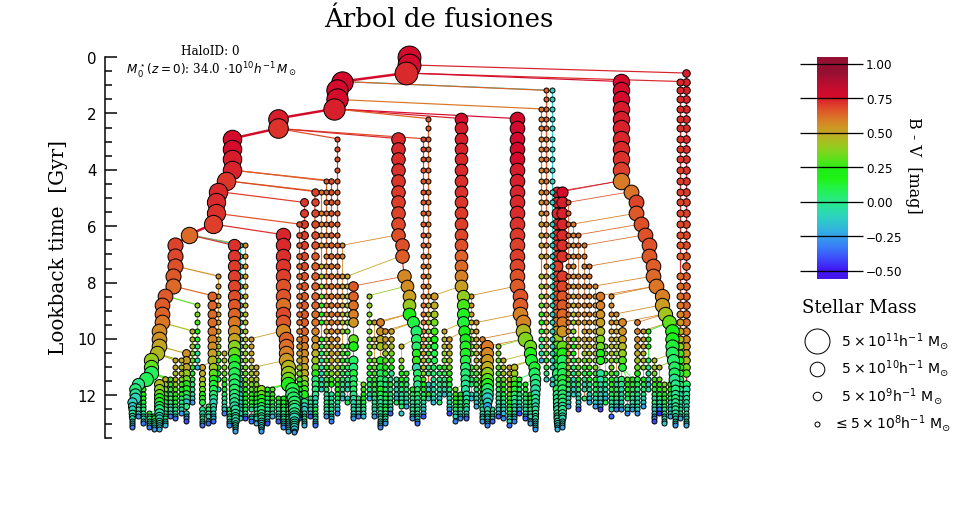

In [6]:
#IDENTIFICAMOS LAS RAMAS
# buscamos la main branch
mainBranch = np.ones(len(modelo))*(-1)
for i in range(len(modelo)):
    mainBranch[i] = 1
    if modelo.firstProgenitorId[i] == -1:
        break
modelo['branch'] = mainBranch    

#buscamos descendientes en la main branch para ordenar la ramas
counter = 1   #cuantas ramas hemos encontrado
Ncrash = np.zeros(sum(modelo.branch==1))
for i in range(sum(modelo.branch==1)):   #recorremos secuencia ppal
    if sum(modelo.descendantId == modelo.galaxyID[i])>1:   #si encontramos choques
        Ncrash[i] = sum(modelo.descendantId == modelo.galaxyID[i])-1   #número de choques en ese redshift
        for j in np.arange(Ncrash[i]):
            ID_choque1 = np.array(modelo.galaxyID[modelo.descendantId==modelo.galaxyID[i]])[int(j+1)]  #galaxyID inicial de cada rama1
            # colocamos en branch las ramas que chocan en mainbranch
            counter += 1 #saltamos de rama en rama definiendo ramas1
            for k in range(int(np.where(np.array(modelo.galaxyID)==ID_choque1)[0]),len(modelo)):  #desde choque hasta final
                modelo.branch[k] = counter
                if modelo.firstProgenitorId[k] == -1:
                    break
ramas1 = counter     #numero de ramas que chocan contra main branch

#seleccionamos las ramas que chocan contra ramas1
for rama in range(2,ramas1+1):    #recorre todas las ramas1
    counter = rama
    modelo_rama = modelo[modelo.branch==rama]
    Ncrash1 = np.zeros(len(modelo_rama))
    for i in range(len(modelo_rama)):  #recorremos la rama buscando choques
        if(sum(modelo.descendantId == np.array(modelo_rama.galaxyID)[i]))>1:  #si encontramos choques
            Ncrash1[i] = sum(modelo.descendantId == np.array(modelo_rama.galaxyID)[i])-1  #número de choques en ese redshift
            counter_max = 1   #controlamos que no haya demasiadas sub ramas
            for j in np.arange(Ncrash1[i]):
                ID_choque2 = np.array(modelo.galaxyID[modelo.descendantId==np.array(modelo_rama.galaxyID)[i]])[int(j+1)]   #galaxyID inicial de la rama2
                #colocamos en branch las ramas que chocan en ramas1
                counter += 0.01
                counter_max += 1
                if counter_max == 100:   # si hay demasiadas sub-ramas
                    break
                else:
                    for k in range (int(np.where(np.array(modelo.galaxyID)==ID_choque2)[0]),len(modelo)):  #desde choque hasta final
                        modelo.branch[k]=counter
                        if modelo.firstProgenitorId[k] == -1:
                            break
                            
# cuántas ramas2 se han generado?
desechadas = np.concatenate(([-1],np.arange(1,ramas1+1)))  #ramas1, MB, -1
branches = np.array(modelo.branch)
ramas2 = np.unique(branches[np.isin(branches,desechadas,invert=True)])
Nramas2 = len(ramas2)

#seleccionamos ramas que chocan contra ramas2
for rama in ramas2:
    counter = rama+0.009   #hay que darles la vuelta en orden para que las primeras choquen antes
    modelo_rama = modelo[modelo.branch==rama]
    Ncrash1 = np.zeros(len(modelo_rama))
    for i in range(len(modelo_rama)):  #recorremos la rama buscando choques
        if(sum(modelo.descendantId == np.array(modelo_rama.galaxyID)[i]))>1:  #si encontramos choques
            Ncrash1[i] = sum(modelo.descendantId == np.array(modelo_rama.galaxyID)[i])-1  #número de choques en ese redshift
            counter_max = 1   #controlamos que no haya demasiadas sub ramas
            for j in np.arange(Ncrash1[i]):
                ID_choque2 = np.array(modelo.galaxyID[modelo.descendantId==np.array(modelo_rama.galaxyID)[i]])[int(j+1)]   #galaxyID inicial de la rama2
                #colocamos en branch las ramas que chocan en ramas1
                counter -= 0.0001
                counter_max += 1
                if counter_max == 89:   # si hay demasiadas sub-ramas
                    break
                else:
                    for k in range (int(np.where(np.array(modelo.galaxyID)==ID_choque2)[0]),len(modelo)):  #desde choque hasta final
                        modelo.branch[k]=counter
                        if modelo.firstProgenitorId[k] == -1:
                            break

# cuántas ramas3 se han generado?
desechadas = np.concatenate(([-1],np.arange(1,ramas1+1),ramas2))  #ramas1, MB, -1
branches = np.array(modelo.branch)
ramas3 = np.unique(branches[np.isin(branches,desechadas,invert=True)])
Nramas3 = len(ramas3)


# ASIGNACIÓN DE LAS POSICIONES INICIALES
ramas = np.sort(np.concatenate(([1],np.arange(2,ramas1+1),ramas2,ramas3)))
Nramas = ramas1+Nramas2+Nramas3
posx = np.linspace(0,10,Nramas)  #posición inicial de las ramas
pasox = posx[1]-posx[0]
# Vemos dónde va cada rama
index1 = []  #indice de ramas1
index2 = []  #indice de ramas2
for i in range(len(ramas)):    #recorremos todas las ramas registradas
    #Obtenemos el índice en ramas1 
    if sum(np.arange(2,ramas1+1)==ramas[i])==1:
        index1.append(i)
    #Obtenemos el índice de ramas2
    if sum(np.arange(1,ramas1+1)==ramas[i])==0:
        index2.append(i)


# CREAMOS LA FIGURA
fig = plt.figure(figsize=(12,7))
fig.suptitle('Árbol de fusiones',fontsize=26,fontname='serif')
subfig = fig.subfigures(1,2,width_ratios=[10,1],wspace=0)
ax = subfig[0].subplots()


#Parámetros del gráfico
#ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(bottom=True,top=False,left=True,right=False)
ax.tick_params(which='minor',bottom=True,top=False,left=True,right=False)
#ax.spines[['bottom','left','top','right']].set_linewidth(2.2)

ax.spines[['left']].set_linewidth(1.5)
ax.spines[['bottom','top','right']].set_linewidth(0)


ax.tick_params(axis='both',which='both',direction='in',width=1.5)
ax.tick_params(axis='both',which='major',labelsize=15,length=12,pad=8)
ax.tick_params(axis='both',which='minor',length=7)
#labels ejes
ax.set_xticks([])
ax.set_xlim([-0.5,10.5])
ax.set_ylim([0,13.5])
ax.invert_yaxis()
#titulos
#ax.set_title('Árbol de fusiones',y=1.04,fontsize=22)
ax.set_ylabel('Lookback time  [Gyr]',fontsize=20,fontname='serif',labelpad=10)
ax.text(1.4,0.2,'HaloID: '+str(modelo.haloID[0])+'\n $M_0 ^\star (z=0)$: '+str(modelo.stellarMass[0].round(1))+r' $\cdot 10^{10}h^{-1}\, M_\odot$',fontsize=12,fontname='serif',va='center',ha='center')


# COMENZAMOS A DIBUJAR        
for i in range(len(ramas)):  
    if ramas[i] == 1:    #estamos dibujando main branch
        y = snap2time(np.array(modelo.snapnum[modelo.branch==ramas[i]]))
        x = np.zeros(len(y))   #posición inicial
        for crash in np.arange(ramas1,1,-1):   #recorre toda las ramas que se chocan
            y_crash = snap2time([np.array(modelo.snapnum[modelo.branch==crash])[0]]) #cuándo choca
            x[y<y_crash] = ((Nramas-index1[crash-2])*pasox)/2
        xMB = x.copy()
        yMB = y.copy()
        ax.plot(x,y,'-',color=BVcolor(np.mean(np.array(modelo.color[modelo.branch==ramas[i]])[0:7]),maximo_color,minimo_color),linewidth=2.5)    #dibujamos la MB
        #asignamos color B-V
        for i_plot in range(len(y)):
            ax.plot(x[i_plot],y[i_plot],'o',markersize=factormasa(np.array(modelo.stellarMass[modelo.branch==ramas[i]])[i_plot]),markeredgecolor='k',zorder=10,color=BVcolor(np.array(modelo.color[modelo.branch==ramas[i]])[i_plot],maximo_color,minimo_color),clip_on=False)
        
        
        
    elif sum(np.arange(2,ramas1+1)==ramas[i])==1:   #ramas1
        num_rama1 = ramas[i]
        j_rama1 = i
        y = snap2time(np.array(modelo.snapnum[modelo.branch==ramas[i]]))
        x = 10*np.ones(len(y))-(i-1)*pasox   #posición inicial
        j = 1   #contador
        factor = 0   #escala de desplazamiento
        for crash in np.flip(ramas2[np.logical_and(ramas2<(ramas[i]+1),ramas2>ramas[i])]):    #recorre ramas2 que chocan
            y_crash = snap2time([np.array(modelo.snapnum[modelo.branch==crash])[0]])  #cuándo choca
            factor = (j+factor)*pasox
            j += 1
            x[y<y_crash] -= factor*pasox/2
        ax.plot(x,y,color=BVcolor(np.mean(np.array(modelo.color[modelo.branch==ramas[i]])[0:4]),maximo_color,minimo_color),linewidth=1.2)
        y1 = y.copy()
        x1 = x.copy()        
        #lineas horizontales de choque
        y0 = np.array([y[0],float(snap2time(np.array(modelo.snapnum[modelo.branch==ramas[i]]+1))[0])])
        x0 = np.array([x[0],float(xMB[yMB==y0[1]])])
        ax.plot(x0,y0,color=BVcolor(np.mean(np.array(modelo.color[modelo.branch==ramas[i]])[0:4]),maximo_color,minimo_color),zorder=-3,linewidth=1.2)
        #asignamos color B-V
        for i_plot in range(len(y)):
            ax.plot(x[i_plot],y[i_plot],'o',markersize=factormasa(np.array(modelo.stellarMass[modelo.branch==ramas[i]])[i_plot]),markeredgecolor='k',zorder=8,color=BVcolor(np.array(modelo.color[modelo.branch==ramas[i]])[i_plot],maximo_color,minimo_color),clip_on=False)
        
    
    elif sum(ramas2==ramas[i])==1:  #ramas2
        num_rama2 = ramas[i]
        j_rama2 = i
        y = snap2time(np.array(modelo.snapnum[modelo.branch==ramas[i]]))
        x = np.ones(len(y))*10-(np.array(index1)[int(num_rama1)-1]-1)*pasox+(i-j_rama1)*pasox
        j = 1
        factor = 0
        for crash in np.flip(ramas3[np.logical_and(ramas3<(ramas[i]+0.01),ramas3>ramas[i])]):    #recorre ramas2 que chocan
            y_crash = snap2time([np.array(modelo.snapnum[modelo.branch==crash])[0]])  #cuándo choca
            factor = (j+factor)*pasox/1.5
            j += 1
            x[y<y_crash] += factor*pasox/1.5
        
        ax.plot(x,y,color=BVcolor(np.mean(np.array(modelo.color[modelo.branch==ramas[i]])[0:2]),maximo_color,minimo_color),linewidth=0.8)
        y2 = y.copy()
        x2 = x.copy()
        #lineas horizontales de choque
        y0_new = np.array([y[0],float(snap2time(np.array(modelo.snapnum[modelo.branch==ramas[i]]+1))[0])])
        if sum(y1==y0_new[1])!=1:   # si no registra galaxia cuando choca
            y0_new = np.array([y[0],float(snap2time(np.array(modelo.snapnum[modelo.branch==ramas[i]]+1))[1])])
            newz_index = int(np.array(np.where(y1==y0_new[1]))[0])-1
            y0 = np.array([y[0],y1[newz_index]])
            x0 = np.array([x[0],float(x1[y1==y0[1]])])
        else:
            y0 = y0_new.copy()
            x0 = np.array([x[0],float(x1[y1==y0[1]])])
        ax.plot(x0,y0,color=BVcolor(np.mean(np.array(modelo.color[modelo.branch==ramas[i]])[0:2]),maximo_color,minimo_color),zorder=-4,linewidth=0.8)
        
        #para situar ramas3
        cuant_rama3 = 1
        
        #asignamos color B-V
        for i_plot in range(len(y)):
            ax.plot(x[i_plot],y[i_plot],'o',markersize=factormasa(np.array(modelo.stellarMass[modelo.branch==ramas[i]])[i_plot]),markeredgecolor='k',zorder=6,color=BVcolor(np.array(modelo.color[modelo.branch==ramas[i]])[i_plot],maximo_color,minimo_color),clip_on=False)
     
        
        
       
    
    elif sum(ramas3==ramas[i])==1:  #ramas3
        y = snap2time(np.array(modelo.snapnum[modelo.branch==ramas[i]]))
        #x = np.ones(len(y))*10-(np.array(index1)[int(num_rama1)-1]-1)*pasox+(i-j_rama1)*pasox+(j_rama2-i+1)*pasox
        #x = np.ones(len(y))*10-(np.array(index1)[int(num_rama1)-1]-1)*pasox-(j_rama1-j_rama2)*pasox
        x = np.ones(len(y))*10-(np.array(index1)[int(num_rama1)-1]-1)*pasox+(j_rama2-j_rama1)*pasox+cuant_rama3*pasox
        cuant_rama3 += 1 #aumentamos 1 rama
        
        ax.plot(x,y,color=BVcolor(np.mean(np.array(modelo.color[modelo.branch==ramas[i]])[0:2]),maximo_color,minimo_color),linewidth=0.7)
        #lineas horizontales de choque
        y02_new = np.array([y[0],float(snap2time(np.array(modelo.snapnum[modelo.branch==ramas[i]]+1))[0])])
        if sum(y2==y02_new[1])!=1:   #si no registra galaxia cuando choca
            y02_new = np.array([y[0],float(snap2time(np.array(modelo.snapnum[modelo.branch==ramas[i]]+1))[1])])
            if sum(y2==y02_new[1])!=1:   #si no registra galaxia cuando choca
                pass    # no lo dibujes, repite el anterior          
                
            else:
                newz_index = int(np.where(y2==y02_new[1])[0])-1
                y02 = np.array([y[0],y2[newz_index]])
                x02 = np.array([x[0],float(x2[y2==y02[1]])])
                
        else:
            y02 = y02_new.copy()
            x02 = np.array([x[0],float(x2[y2==y02[1]])])
        ax.plot(x02,y02,color=BVcolor(np.mean(np.array(modelo.color[modelo.branch==ramas[i]])[0:4]),maximo_color,minimo_color),zorder=-5,linewidth=0.7)
        #asignamos color B-V
        for i_plot in range(len(y)):
            ax.plot(x[i_plot],y[i_plot],'o',markersize=factormasa(np.array(modelo.stellarMass[modelo.branch==ramas[i]])[i_plot]),markeredgecolor='k',zorder=4,color=BVcolor(np.array(modelo.color[modelo.branch==ramas[i]])[i_plot],maximo_color,minimo_color))

            
#DIBUJAMOS LAS LEYENDAS MANUALMENTE
axs = subfig[1].subplots(2,1,gridspec_kw = {'height_ratios': [2, 1], 'hspace': 0.3})

#Colorbar
y_bar = np.linspace(minimo_color,maximo_color,1000)
x_bar = np.zeros(len(y_bar))
for i in range(len(y_bar)):
    axs[0].plot(x_bar[i],y_bar[i],'s',markersize=30,color=BVcolor(y_bar[i],maximo_color,minimo_color),zorder=-12)

axs[0].set_xticks([])
axs[0].set_yticks(np.arange(-0.5,1.1,0.25))
axs[0].set_ylim(minimo_color,maximo_color)
axs[0].set_xlim(-0.1,0.1)
axs[0].yaxis.set_label_position("right")
axs[0].yaxis.tick_right()
axs[0].spines[['bottom','top','left','right']].set_linewidth(0)
axs[0].tick_params(axis='both',which='both',direction='in',width=1.3)
axs[0].tick_params(axis='both',which='major',labelsize=12,length=63,pad=3)
axs[0].set_ylabel('B - V  [mag] ',fontname='serif',fontsize=16,rotation=270,labelpad=20)


#Tamaños masas
axs[1].spines[['bottom','top','left','right']].set_linewidth(0)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlim(-3.2,10)
axs[1].set_ylim(0.5,4.5)

axs[1].set_title('Stellar Mass',fontsize=18,fontname='serif',pad=15,loc='left')


axs[1].plot(0,1,'o',color=(1,1,1),markeredgecolor='k',markersize=factormasa(0.05))
axs[1].text(3.5,1,r'$\leq 5 \times 10^{8} {\rm h}^{-1} \ {\rm M}_{\odot}$',fontsize=14,color='k',va='center',ha='left')

axs[1].plot(0,2,'o',color=(1,1,1),markeredgecolor='k',markersize=factormasa(0.5))
axs[1].text(3.5,2,r'  $5 \times 10^{9} {\rm h}^{-1} \ {\rm M}_{\odot}$',fontsize=14,color='k',va='center',ha='left')

axs[1].plot(0,3,'o',color=(1,1,1),markeredgecolor='k',markersize=factormasa(5))
axs[1].text(3.5,3,r'  $5 \times 10^{10} {\rm h}^{-1} \ {\rm M}_{\odot}$',fontsize=14,color='k',va='center',ha='left')

axs[1].plot(0,4,'o',color=(1,1,1),markeredgecolor='k',markersize=factormasa(50))
axs[1].text(3.5,4,r'  $5 \times 10^{11} {\rm h}^{-1} \ {\rm M}_{\odot}$',fontsize=14,color='k',va='center',ha='left')


plt.show()


#print('Masa actual del halo de DM:',dmat.m_Mean200[0].round(0),'e10')
 